# Unit 4 Exercise 2: Finding anomalies in fraudulent transactions

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
credit_df = pd.read_csv('drive/MyDrive/Terminal34/creditcard.csv')
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
credit_df.isna().any(axis=1).unique()

array([False])

<Axes: xlabel='Amount', ylabel='Count'>

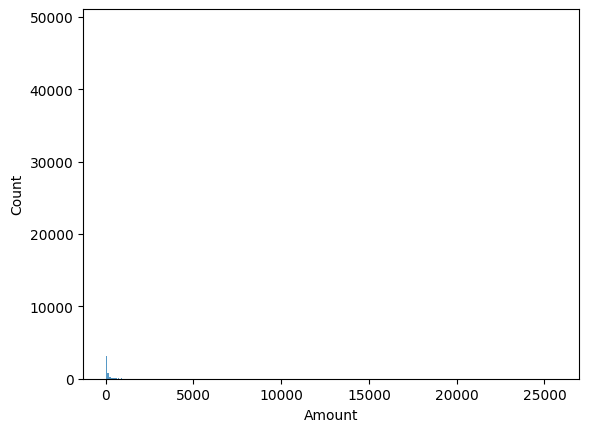

In [ ]:
sns.histplot(data=credit_df, x='Amount')

In [ ]:
# Apply PCA
pca = PCA(n_components=2) # Reduce to 2 dimensions for visualization purposes
principal_components = pca.fit_transform(credit_df.drop(['Class'], axis=1))
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [ ]:
principal_df['Class'] = credit_df['Class'].values

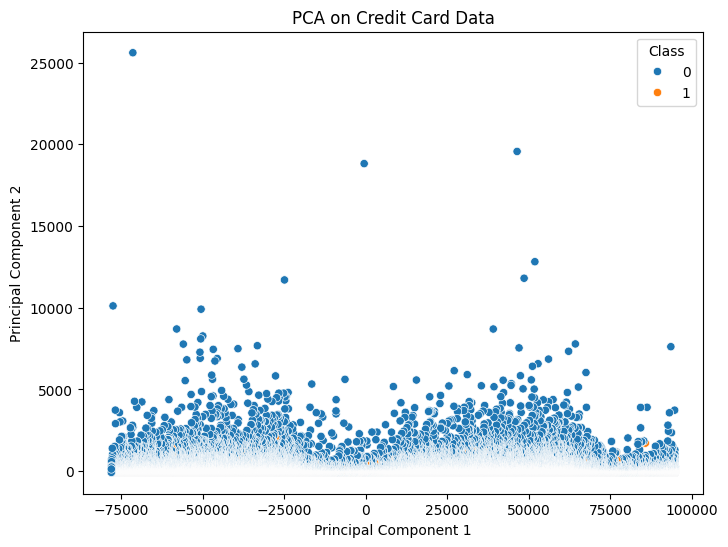

In [ ]:
# Visualize the PCA output
plt.figure(figsize=(8, 6))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Class')
plt.title('PCA on Credit Card Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Apply PCA
pca = PCA(n_components=2) # Reduce to 2 dimensions for visualization purposes
principal_components = pca.fit_transform(credit_df.drop(['Class', 'Amount', 'Time'], axis=1))
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [ ]:
principal_df['Class'] = credit_df['Class'].values

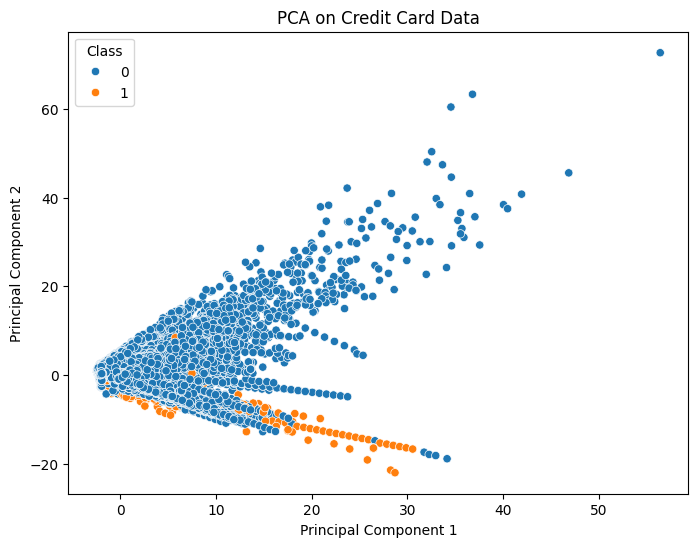

In [ ]:
# Visualize the PCA output
plt.figure(figsize=(8, 6))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Class')
plt.title('PCA on Credit Card Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Standardize the Amount feature
scaler = StandardScaler()
credit_df['Amount'] = scaler.fit_transform(credit_df['Amount'].values.reshape(-1, 1))

<Axes: xlabel='Amount', ylabel='Count'>

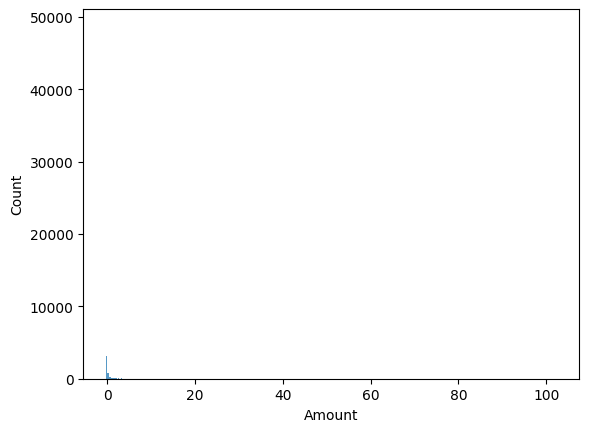

In [ ]:
sns.histplot(data=credit_df, x='Amount')

In [ ]:
# Apply PCA
pca = PCA(n_components=2) # Reduce to 2 dimensions for visualization purposes
principal_components = pca.fit_transform(credit_df.drop(['Class', 'Time'], axis=1))
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [ ]:
principal_df['Class'] = credit_df['Class'].values

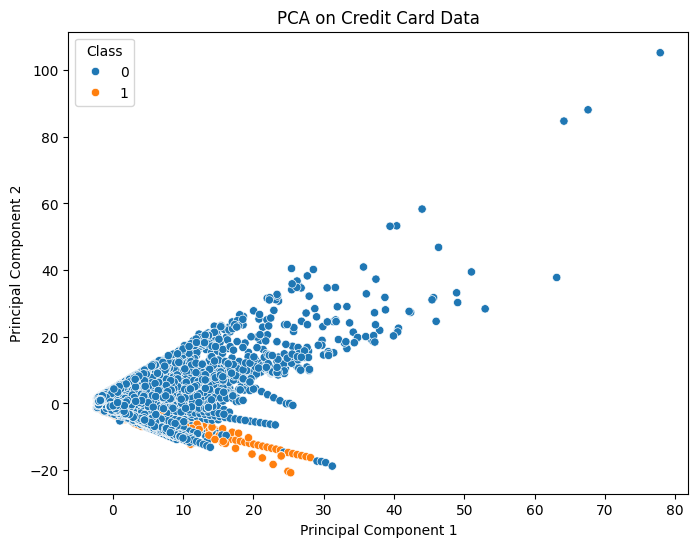

In [ ]:
# Visualize the PCA output
plt.figure(figsize=(8, 6))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Class')
plt.title('PCA on Credit Card Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## IQR

In [ ]:
Q1 = credit_df['Amount'].quantile(0.25)
Q3 = credit_df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
distance = 100
lower_bound = Q1 - distance * IQR
upper_bound = Q3 + distance * IQR

# Detect outliers
outliers = credit_df[(credit_df['Amount'] < lower_bound) | (credit_df['Amount'] > upper_bound)]
normal_data = credit_df[(credit_df['Amount'] >= lower_bound) & (credit_df['Amount'] <= upper_bound)]

print("Outliers:\n", outliers.index.shape)

Outliers:
 (21,)


In [ ]:
# Function to detect outliers based on IQR
def detect_outliers_iqr(df, outlier_boundary=100):
    outlier_indices = []

    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - outlier_boundary * IQR
        upper_bound = Q3 + outlier_boundary * IQR

        # Find the indices of outliers
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index

        outlier_indices.extend(column_outliers)

    # Select unique indices
    outlier_indices = list(set(outlier_indices))

    #df.loc[outlier_indices]

    return df.loc[outlier_indices], df.drop(outlier_indices)

In [ ]:
# Detect outliers
outliers, normal_data = detect_outliers_iqr(credit_df.drop(['Time', 'Class'], axis=1))
outliers.shape

(47, 29)

In [ ]:
outliers.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
212992,-5.662559,-13.060085,-5.331624,3.053802,-3.297790,3.201373,4.416635,-0.403262,0.470471,-1.843731,...,7.694578,2.014497,-2.904536,-2.937180,-0.777132,-2.213145,-0.189186,-0.744490,0.612452,15.310952
180234,-9.089688,8.135411,-4.489331,-2.042263,-1.300752,1.392093,-3.856693,-12.126500,4.707811,6.949839,...,-0.315372,11.930338,-3.085448,1.880124,-0.905755,0.399549,-0.288081,0.178700,-0.895181,-0.349671
204811,-1.539499,-6.755175,-4.641340,0.767056,-1.812950,-1.205331,3.149512,-1.241222,-1.295496,0.015281,...,3.978968,1.679222,0.419113,-1.989857,0.183512,0.045350,0.089618,-0.470645,0.252723,7.642943
245772,-4.697887,2.565809,-0.969389,-2.513524,-1.159292,2.190880,-5.114512,-13.483473,0.296148,-3.018124,...,0.782432,-2.038862,1.165167,0.936520,-0.755809,-0.142360,0.530338,-0.097617,-0.221069,0.158126
229391,-1.326713,0.649403,-3.818230,-2.114035,-10.722687,6.026615,9.674628,-2.731137,1.042109,-1.510719,...,-3.339235,0.153870,1.328389,-0.437222,-0.049816,-2.249449,0.276496,1.202437,-0.822944,7.994775


In [ ]:
outliers.index

Int64Index([212992, 180234, 204811, 245772, 229391,  98328,  90137, 221219,
             24616, 213032,
            ...
             65481, 270285, 139217, 278483, 212950, 221144, 245722,  57308,
            155613, 139239],
           dtype='int64', length=2853)

## KMeans

In [ ]:
X = credit_df.drop(['Class', 'Time'], axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


<ipython-input-35-0318be27fc1b>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


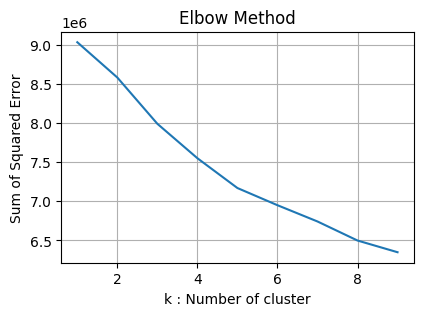

In [ ]:
sse = {}
sil = []
kmax = 10
fig = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))

# Elbow Method :
plt.subplot(1, 2, 1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init='auto').fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

In [ ]:
kmeans = KMeans(n_clusters=5, max_iter=1000).fit(X)
labels = kmeans.predict(X)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 3, 2, ..., 3, 2, 2], dtype=int32)

In [ ]:
principal_df_pca = principal_df.copy()
principal_df_pca['labels'] = labels

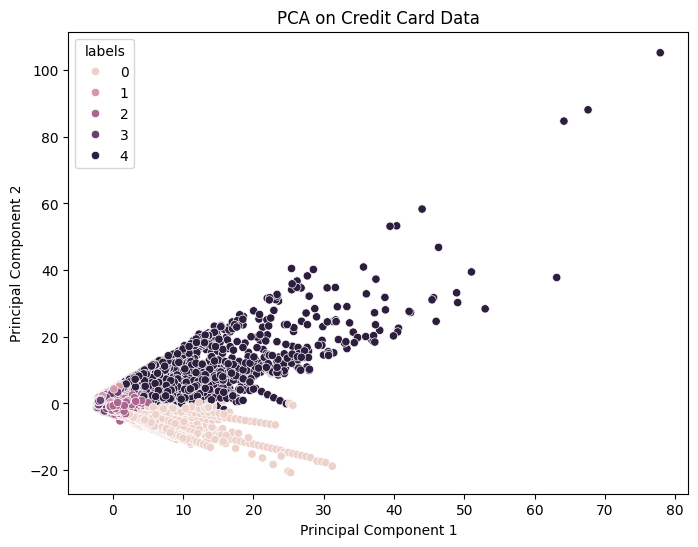

In [ ]:
# Visualize the PCA output
plt.figure(figsize=(8, 6))
sns.scatterplot(data=principal_df_pca, x='PC1', y='PC2', hue='labels')
plt.title('KMeans on Credit Card Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
principal_df_pca['Class'] = credit_df['Class'].values
principal_df_pca.head()

,PC1,PC2,Class,labels
0,1.322342,-0.388961,0,2
1,-1.269729,-0.078913,0,3
2,1.834374,1.341813,0,2
3,0.946944,-0.207824,0,2
4,0.936966,-1.141072,0,2


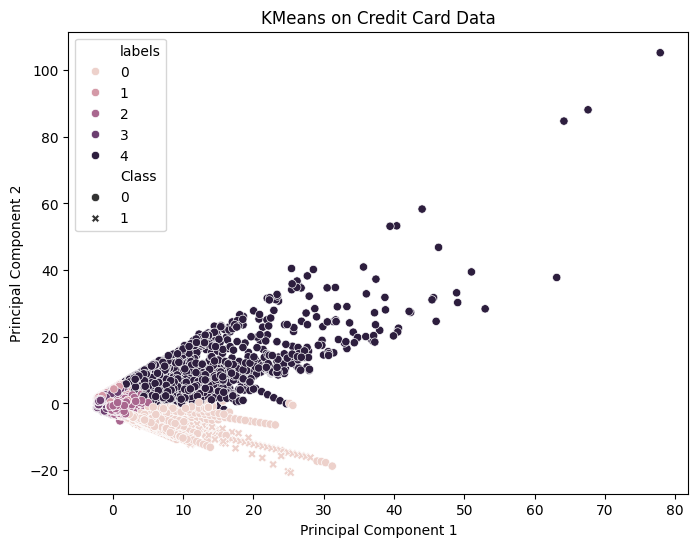

In [ ]:
# Visualize the PCA output
plt.figure(figsize=(8, 6))
sns.scatterplot(data=principal_df_pca, x='PC1', y='PC2', hue='labels', style='Class')
plt.title('KMeans on Credit Card Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
principal_df_pca[principal_df_pca['Class'] == 1].head(50)

,PC1,PC2,Class,labels
541,1.843062,-2.226347,1,2
623,3.745946,2.297582,1,2
4920,2.189986,-1.418564,1,2
6108,3.997466,-2.112942,1,2
6329,-1.617031,-1.875350,1,3
6331,-0.528256,-2.755691,1,3
6334,-0.547650,-2.749458,1,3
6336,-0.794540,-2.420533,1,3
6338,-0.800104,-2.516279,1,3
6427,-0.953793,-1.131301,1,3


In [ ]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32),
 array([  6031,  42832, 124214, 106643,   5087]))